# Regresión Logística

##### La Organización Mundial de la Salud ha estimado que 12 millones de muertes ocurren en todo el mundo, cada año debido a enfermedades del corazón.
- El pronóstico temprano de las enfermedades cardiovasculares puede ayudar a tomar decisiones sobre los cambios en el estilo de vida.
- El dataset fue obtenido de un estudio cardiovascular que se hizo en la ciudad Framingham, Massachusetts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [2]:
heartd = pd.read_csv('framingham.csv')

In [3]:
heartd.shape

(4238, 16)

In [4]:
heartd.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

#### Features
- Age: Edad
- Male: sexo
- Education: Educación
- Current Smoker: Si fuma o no
- CigsPerDay: La cantidad de cigarrillos que una persona fuma en promedio en un día.
- BP Meds: Si el paciente estaba tomando medicamentos para la presión arterial.
- PrevalentStroke: Si el paciente había tenido o no derrame cerebral.
- prevalentHyp: Si el paciente era o no hipertenso.
- diabetes: diabetes
- totChol: Nivel de colesterol
- sysBP: Presión arterial (systolic)
- DiaBP: presión arterial (diastólica)
- BMI: Indice de masa corporal (Body Mass Index)
- heartRate: Frecuencia cardíaca
- glucose: Glucosa
- TenYearCHD(Coronary Heart Disease): Riesgo de enfermedad coronaria en 10 años(Target)

### EDA

In [5]:
heartd.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
mask = (heartd['education'] != 'NaN')
avg_filler = heartd.loc[mask, 'education'].mean()
heartd.loc[heartd['education'].isnull() & mask, 'education'] = avg_filler

/home/gcc/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
#cigsPerDay
mask1 = (heartd['cigsPerDay'] != 'NaN')
avg_filler1 = heartd.loc[mask1, 'cigsPerDay'].mean()
heartd.loc[heartd['cigsPerDay'].isnull() & mask1, 'cigsPerDay'] = avg_filler1

In [8]:
#BPMeds
mask2 = (heartd['BPMeds'] != 'NaN')
avg_filler2 = heartd.loc[mask2, 'BPMeds'].mean()
heartd.loc[heartd['BPMeds'].isnull() & mask2, 'BPMeds'] = avg_filler2

In [9]:
#totChol
mask3 = (heartd['totChol'] != 'NaN')
avg_filler3 = heartd.loc[mask3, 'totChol'].mean()
heartd.loc[heartd['totChol'].isnull() & mask3, 'totChol'] = avg_filler3

In [10]:
#BMI
mask4 = (heartd['BMI'] != 'NaN')
avg_filler4 = heartd.loc[mask4, 'BMI'].mean()
heartd.loc[heartd['BMI'].isnull() & mask4, 'BMI'] = avg_filler4

In [11]:
#glucose
mask5 = (heartd['glucose'] != 'NaN')
avg_filler5 = heartd.loc[mask5, 'glucose'].mean()
heartd.loc[heartd['glucose'].isnull() & mask5, 'glucose'] = avg_filler5

In [12]:
heartd.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
heartd.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4238.000000    4238.000000  4238.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.007075       0.500024    11.879230   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

           BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4238.00000      4238.000000   4238.000000  4238.000000  4238.000000   
mean      0.02963         0.005899      0.310524     0.025720   236.721585   
std       0.16852         0.076587      0.462763     0.158316    44.326453   
min       0.00000         0.000000      0.000000     0.000000   107.000000   
25%       0.00000         0.000000      0.000000     0.000000   206.000000   
50%       0.00000         0.000000      0.000000     0.000000   234.000000   
75%       0.00000         0.000000      1.000000     0.000000   262.000000   
max       1.00000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4238.000000  4237.000000  4238.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.070953    12.026596    22.836603   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    72.000000   
50%     128.000000    82.000000    25.410000    75.000000    80.000000   
75%     144.000000    89.875000    28.037500    83.000000    85.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

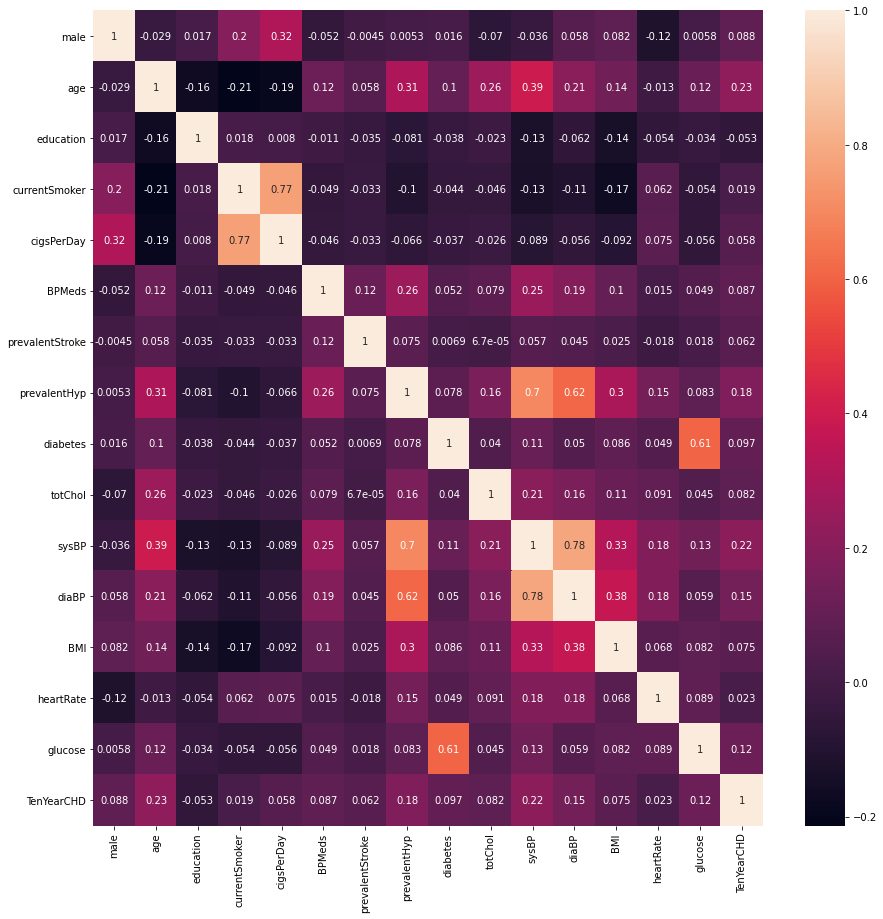

In [14]:
f, ax = plt.subplots(figsize=(15, 15))
corr = heartd.corr()
sns.heatmap(corr, annot=True)

### La correlación entre sysBP y diaBP son similares.
#### Correlación alta
- cigsPerDay y CurrentSmoker
- sysBP y diaBP
#### Correlación Media
- glucose y diabetes
- SysBP y prevalentStroke
- diaBP y prevalentHyp
#### Correlación Baja
- male y heartRate

In [15]:
#del heartd['nombreColumna']
del heartd['currentSmoker']
del heartd['diaBP']
del heartd['diabetes']
del heartd['prevalentStroke']
del heartd['prevalentHyp']

In [16]:
heartd.head(5)

male  age  education  cigsPerDay  BPMeds  totChol  sysBP    BMI  heartRate  \
0     1   39        4.0         0.0     0.0    195.0  106.0  26.97       80.0   
1     0   46        2.0         0.0     0.0    250.0  121.0  28.73       95.0   
2     1   48        1.0        20.0     0.0    245.0  127.5  25.34       75.0   
3     0   61        3.0        30.0     0.0    225.0  150.0  28.58       65.0   
4     0   46        3.0        23.0     0.0    285.0  130.0  23.10       85.0   

   glucose  TenYearCHD  
0     77.0           0  
1     76.0           0  
2     70.0           0  
3    103.0           1  
4     85.0           0

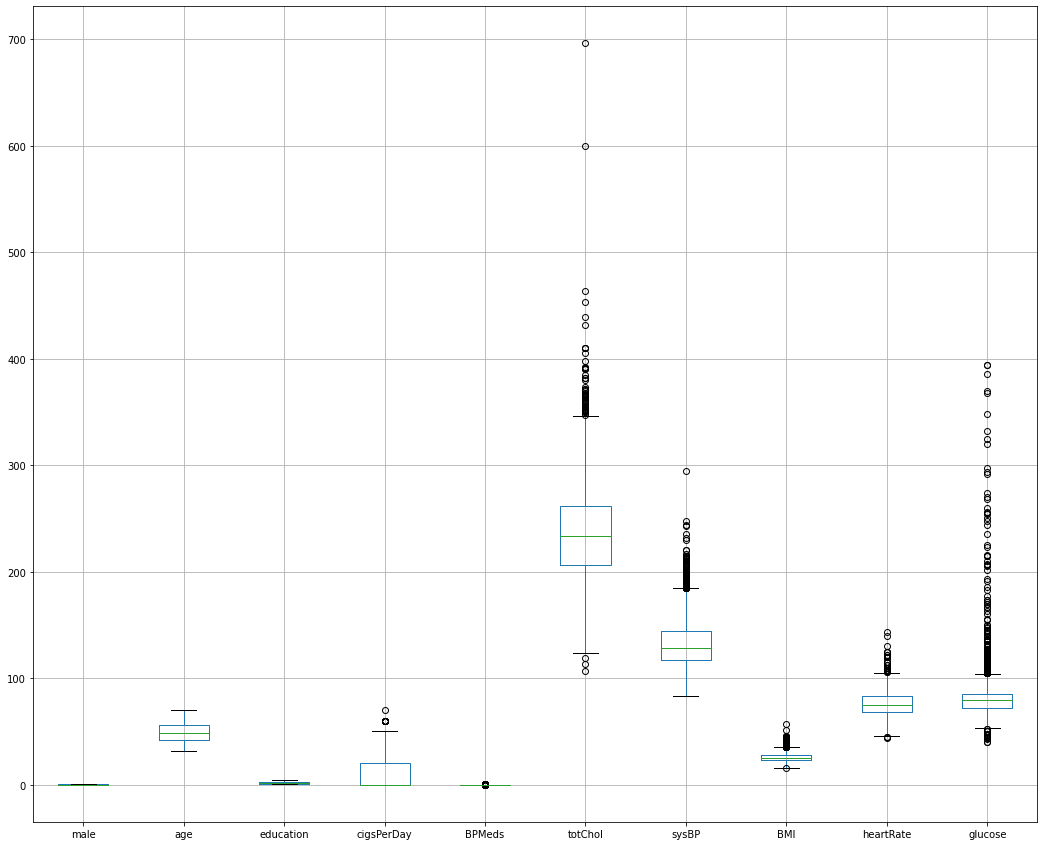

In [17]:
heartd.boxplot(column=['male', 'age','education', 'cigsPerDay','BPMeds','totChol','sysBP','BMI','heartRate','glucose'],figsize=(18,15))

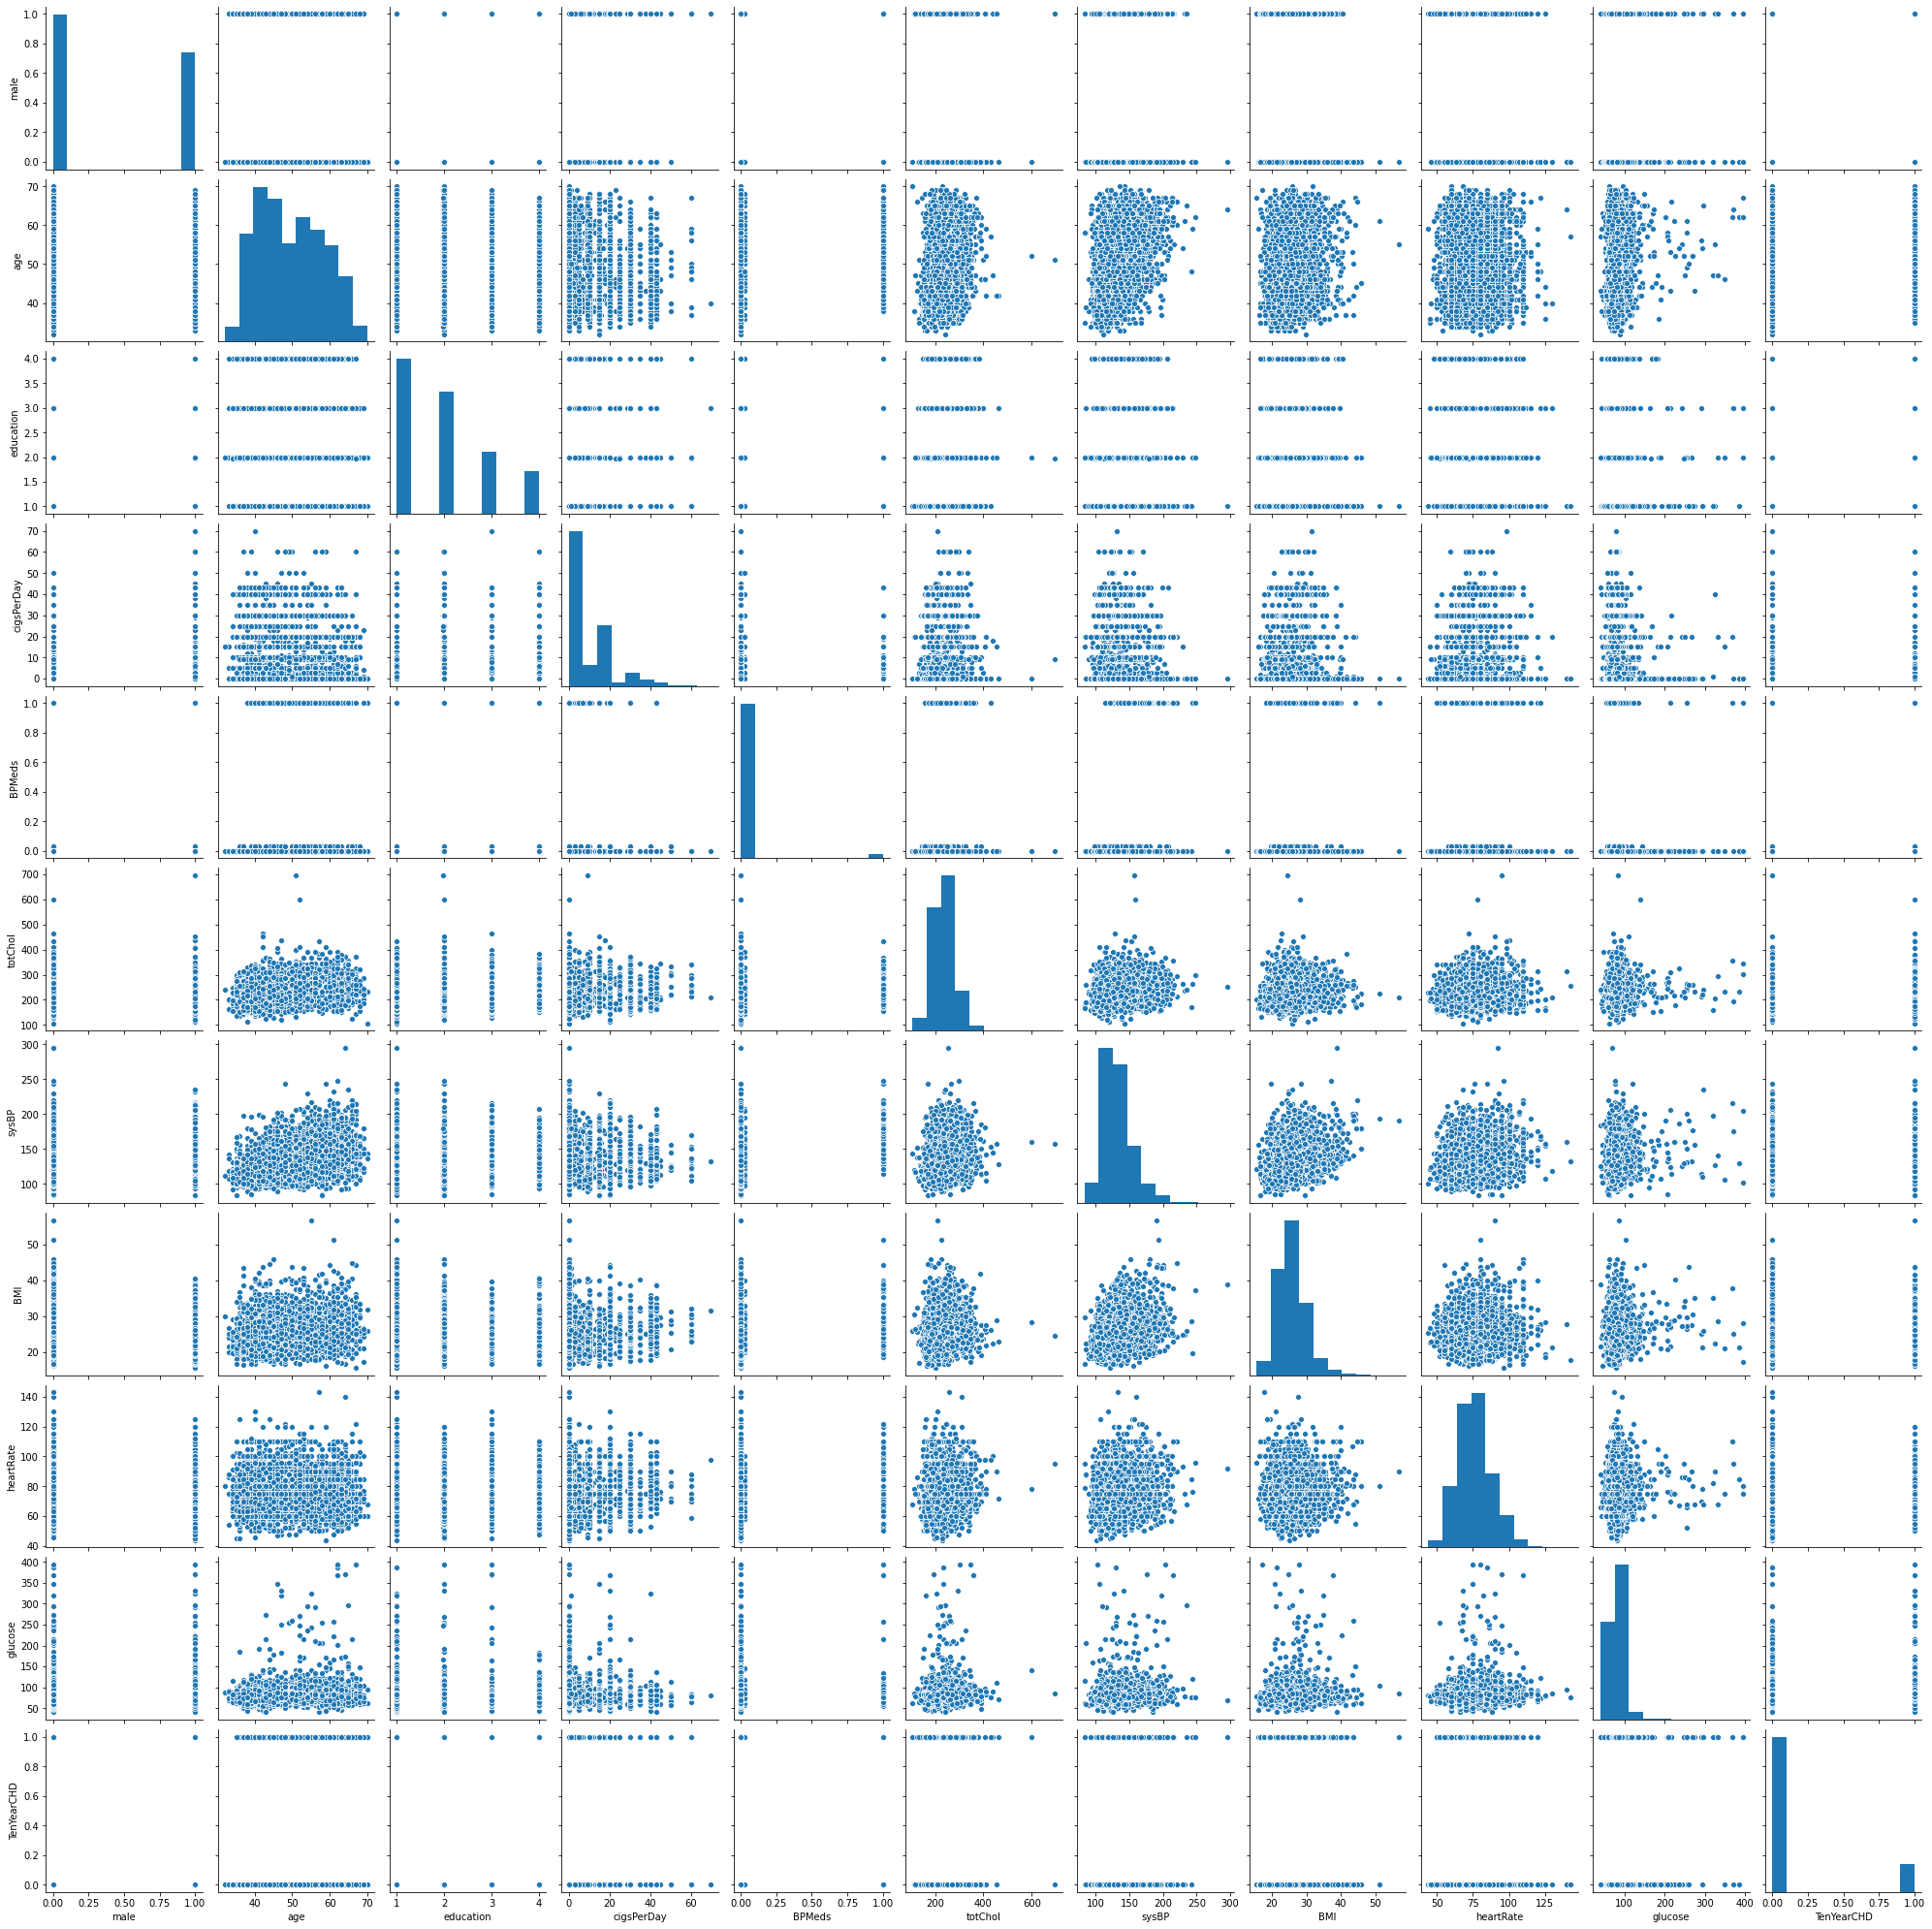

In [18]:
g = sns.pairplot(heartd)
g

In [19]:
heartd.dropna(axis=0,inplace=True)

In [20]:
heartd.isnull().sum()

male          0
age           0
education     0
cigsPerDay    0
BPMeds        0
totChol       0
sysBP         0
BMI           0
heartRate     0
glucose       0
TenYearCHD    0
dtype: int64

In [21]:
#male, BPMeds y education tienen baja variabilidad.
nheartd=heartd[['age','cigsPerDay','totChol','sysBP','BMI','heartRate','glucose','TenYearCHD']]
x=nheartd.iloc[:,:-1] # todas las columnas menos 'TenYearCHD'
y=nheartd.iloc[:,-1] # Columna 'TenYearCHD'
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

### MODELO

In [22]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

### Matriz de confusión

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

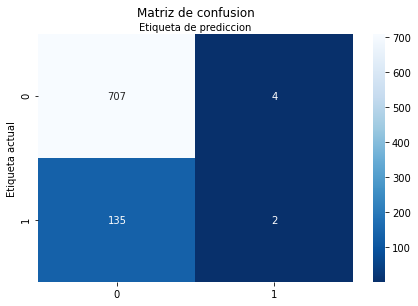

In [24]:
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix),annot=True,cmap='Blues_r',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion',y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

In [25]:
metrics.accuracy_score(y_test,y_pred)

0.8360849056603774

In [26]:
heartd.shape

(4237, 11)